In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
df = pickle.load(open('dataset_level3.pkl','rb'))

In [3]:
df

,match_id,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
0,7,South Africa,India,Johannesburg,3,119,10,18.000000,NaN,219
1,7,South Africa,India,Johannesburg,3,118,10,9.000000,NaN,219
2,7,South Africa,India,Johannesburg,4,117,10,8.000000,NaN,219
3,7,South Africa,India,Johannesburg,5,116,10,7.500000,NaN,219
4,7,South Africa,India,Johannesburg,9,115,10,10.800000,NaN,219
...,...,...,...,...,...,...,...,...,...,...
50111,964,Sri Lanka,Pakistan,Lahore,144,4,4,7.448276,41.0,147
50112,964,Sri Lanka,Pakistan,Lahore,145,3,4,7.435897,41.0,147
50113,964,Sri Lanka,Pakistan,Lahore,146,2,4,7.423729,41.0,147
50114,964,Sri Lanka,Pakistan,Lahore,147,1,4,7.411765,41.0,147


In [4]:
df['match_id'].nunique()

412

In [5]:
df['runs_added'] = (df['runs_x']-df['current_score'])

In [6]:
df

,match_id,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x,runs_added
0,7,South Africa,India,Johannesburg,3,119,10,18.000000,NaN,219,216
1,7,South Africa,India,Johannesburg,3,118,10,9.000000,NaN,219,216
2,7,South Africa,India,Johannesburg,4,117,10,8.000000,NaN,219,215
3,7,South Africa,India,Johannesburg,5,116,10,7.500000,NaN,219,214
4,7,South Africa,India,Johannesburg,9,115,10,10.800000,NaN,219,210
...,...,...,...,...,...,...,...,...,...,...,...
50111,964,Sri Lanka,Pakistan,Lahore,144,4,4,7.448276,41.0,147,3
50112,964,Sri Lanka,Pakistan,Lahore,145,3,4,7.435897,41.0,147,2
50113,964,Sri Lanka,Pakistan,Lahore,146,2,4,7.423729,41.0,147,1
50114,964,Sri Lanka,Pakistan,Lahore,147,1,4,7.411765,41.0,147,0


In [7]:
df.loc[df['balls_left']==0]

,match_id,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x,runs_added
121,7,South Africa,India,Johannesburg,219,0,6,10.950000,78.0,219,0
246,8,England,India,London,153,0,3,7.650000,49.0,153,0
247,8,England,India,London,153,0,3,7.586777,45.0,153,0
603,15,South Africa,Australia,Melbourne,101,0,3,5.050000,30.0,101,0
731,16,India,Australia,Mirpur,158,0,3,7.900000,54.0,159,1
...,...,...,...,...,...,...,...,...,...,...,...
49863,956,Australia,Sri Lanka,Melbourne,164,0,4,8.200000,47.0,168,4
49864,956,Australia,Sri Lanka,Melbourne,168,0,4,8.330579,49.0,168,0
49986,958,Australia,India,Mumbai,165,0,5,8.250000,48.0,166,1
49987,958,Australia,India,Mumbai,166,0,5,8.231405,47.0,166,0


In [8]:
temp = df

In [9]:
#for i in range(len(df)-1):
#    if df.iloc[i]['balls_left'] == df.iloc[i+1]['balls_left']:
#        temp = temp.drop(i)

In [10]:
#df = temp

In [11]:
for i in range(30):
    temp = pd.concat([temp, df[df['balls_left'] == 0]])
    temp = pd.concat([temp, df[df['wickets_left'] == 0]])

In [12]:
df = temp

In [13]:
df

,match_id,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x,runs_added
0,7,South Africa,India,Johannesburg,3,119,10,18.000000,NaN,219,216
1,7,South Africa,India,Johannesburg,3,118,10,9.000000,NaN,219,216
2,7,South Africa,India,Johannesburg,4,117,10,8.000000,NaN,219,215
3,7,South Africa,India,Johannesburg,5,116,10,7.500000,NaN,219,214
4,7,South Africa,India,Johannesburg,9,115,10,10.800000,NaN,219,210
...,...,...,...,...,...,...,...,...,...,...,...
44104,870,Sri Lanka,South Africa,Delhi,120,3,0,6.153846,25.0,120,0
44212,872,India,Australia,Melbourne,74,15,0,4.228571,23.0,74,0
46407,906,Australia,Pakistan,Dubai,89,3,0,4.564103,21.0,89,0
48144,931,South Africa,New Zealand,Johannesburg,133,3,0,6.820513,25.0,133,0


In [14]:
df.sort_values(by = ['match_id', 'balls_left'], ascending = [True, False])

,match_id,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x,runs_added
0,7,South Africa,India,Johannesburg,3,119,10,18.00,NaN,219,216
1,7,South Africa,India,Johannesburg,3,118,10,9.00,NaN,219,216
2,7,South Africa,India,Johannesburg,4,117,10,8.00,NaN,219,215
3,7,South Africa,India,Johannesburg,5,116,10,7.50,NaN,219,214
4,7,South Africa,India,Johannesburg,9,115,10,10.80,NaN,219,210
...,...,...,...,...,...,...,...,...,...,...,...
50115,964,Sri Lanka,Pakistan,Lahore,147,0,3,7.35,41.0,147,0
50115,964,Sri Lanka,Pakistan,Lahore,147,0,3,7.35,41.0,147,0
50115,964,Sri Lanka,Pakistan,Lahore,147,0,3,7.35,41.0,147,0
50115,964,Sri Lanka,Pakistan,Lahore,147,0,3,7.35,41.0,147,0


In [15]:
runs = np.where(df['last_five'].isnull(),df['current_score'],df['last_five'])

In [16]:
df['last_five'] = runs

In [17]:
df

,match_id,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x,runs_added
0,7,South Africa,India,Johannesburg,3,119,10,18.000000,3.0,219,216
1,7,South Africa,India,Johannesburg,3,118,10,9.000000,3.0,219,216
2,7,South Africa,India,Johannesburg,4,117,10,8.000000,4.0,219,215
3,7,South Africa,India,Johannesburg,5,116,10,7.500000,5.0,219,214
4,7,South Africa,India,Johannesburg,9,115,10,10.800000,9.0,219,210
...,...,...,...,...,...,...,...,...,...,...,...
44104,870,Sri Lanka,South Africa,Delhi,120,3,0,6.153846,25.0,120,0
44212,872,India,Australia,Melbourne,74,15,0,4.228571,23.0,74,0
46407,906,Australia,Pakistan,Dubai,89,3,0,4.564103,21.0,89,0
48144,931,South Africa,New Zealand,Johannesburg,133,3,0,6.820513,25.0,133,0


In [18]:
df.isnull().sum()

match_id         0
batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
runs_added       0
dtype: int64

In [19]:
final_df = df

In [20]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_added']]

In [21]:
df['runs_added'].value_counts()

0      13089
1       1116
2        850
4        638
6        549
       ...  
254        1
253        1
249        1
247        1
243        1
Name: runs_added, Length: 256, dtype: int64

In [22]:
from sklearn.model_selection import GroupShuffleSplit 

splitter = GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7)
split = splitter.split(df, groups=df['match_id'])
train_inds, test_inds = next(split)

train = df.iloc[train_inds]
test = df.iloc[test_inds]

In [23]:
train

,match_id,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x,runs_added
0,7,South Africa,India,Johannesburg,3,119,10,18.000000,3.0,219,216
1,7,South Africa,India,Johannesburg,3,118,10,9.000000,3.0,219,216
2,7,South Africa,India,Johannesburg,4,117,10,8.000000,4.0,219,215
3,7,South Africa,India,Johannesburg,5,116,10,7.500000,5.0,219,214
4,7,South Africa,India,Johannesburg,9,115,10,10.800000,9.0,219,210
...,...,...,...,...,...,...,...,...,...,...,...
41935,832,Bangladesh,Pakistan,Cape Town,140,2,0,7.118644,21.0,140,0
43983,866,England,South Africa,Nottingham,111,1,0,5.596639,21.0,111,0
44104,870,Sri Lanka,South Africa,Delhi,120,3,0,6.153846,25.0,120,0
44212,872,India,Australia,Melbourne,74,15,0,4.228571,23.0,74,0


In [24]:
test

,match_id,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x,runs_added
356,13,Pakistan,South Africa,Abu Dhabi,1,119,10,6.000000,1.0,119,118
357,13,Pakistan,South Africa,Abu Dhabi,1,118,10,3.000000,1.0,119,118
358,13,Pakistan,South Africa,Abu Dhabi,2,117,10,4.000000,2.0,119,117
359,13,Pakistan,South Africa,Abu Dhabi,3,116,10,4.500000,3.0,119,116
360,13,Pakistan,South Africa,Abu Dhabi,7,115,10,8.400000,7.0,119,112
...,...,...,...,...,...,...,...,...,...,...,...
35771,703,South Africa,Sri Lanka,Colombo,98,20,0,5.880000,22.0,98,0
36260,722,South Africa,Sri Lanka,Johannesburg,113,3,0,5.794872,22.0,113,0
36384,725,New Zealand,India,Johannesburg,190,0,0,9.500000,78.0,190,0
46407,906,Australia,Pakistan,Dubai,89,3,0,4.564103,21.0,89,0


In [25]:
#X_train = train[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five']]
#X_test = test[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five']]
#y_train = train['runs_added']
#y_test = test['runs_added']
X = final_df.drop(columns=['runs_added'])
y = final_df['runs_added']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [26]:
y_train

25476    128
23615     17
30222    172
3873       4
33727      0
        ... 
32511    141
5192      74
12172     13
33003    123
47901      0
Name: runs_added, Length: 52044, dtype: int64

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt

In [28]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [29]:
#XGBoost Regression

In [30]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [31]:
pipe.fit(X_train,y_train)

/home/astthecoder/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rou...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=12, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=1000,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=1, ...))])

In [32]:
y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred)) 
print(mean_absolute_error(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))

0.9900379193630737
2.196729882793737
5.648247456805429


In [33]:
pickle.dump(pipe,open('pipe_update1.pkl','wb'))

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

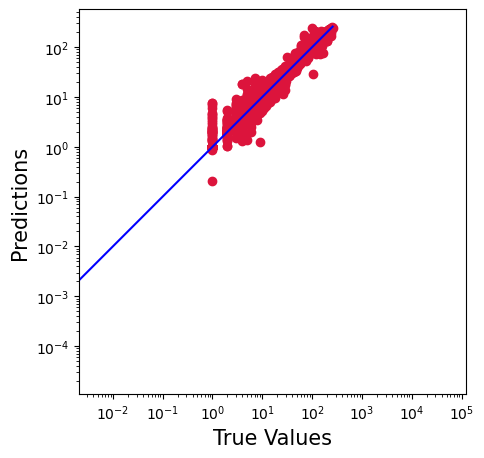

In [35]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

/tmp/ipykernel_94253/2240557131.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/tmp/ipykernel_94253/2240557131.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values

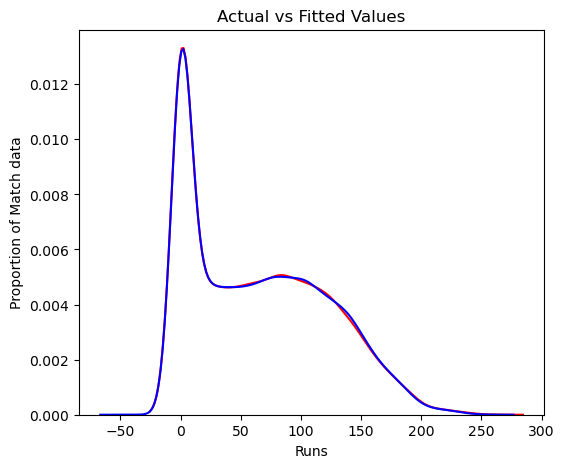

In [36]:
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values')
plt.xlabel('Runs')
plt.ylabel('Proportion of Match data')

plt.show()
plt.close()

In [37]:
#Lasso Regression

In [38]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [39]:
pipe_Lasso = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',GridSearchCV(Lasso(),{'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]},scoring='neg_mean_squared_error',cv=5))
])

In [40]:
pipe_Lasso.fit(X_train,y_train)

/home/astthecoder/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/astthecoder/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.627e+06, tolerance: 1.331e+04
  model = cd_fast.enet_coordinate_descent(
/home/astthecoder/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.702e+06, tolerance: 1.335e+04
  model = cd_fast.enet_coordinate

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3',
                 GridSearchCV(cv=5, estimator=Lasso(),
                              param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                    0.01, 1, 5, 10, 20, 30, 35,
                                                    40]},
                              scoring='neg_mean_squared_error'))])

In [41]:
y_pred_lasso = pipe_Lasso.predict(X_test)

print(r2_score(y_test,y_pred_lasso)) 
print(mean_absolute_error(y_test,y_pred_lasso))
print(sqrt(mean_squared_error(y_test,y_pred_lasso)))

0.884106433230061
13.527112984555973
19.26497073319714


In [42]:
pickle.dump(pipe,open('pipe_update2.pkl','wb'))

/tmp/ipykernel_94253/4058333946.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/tmp/ipykernel_94253/4058333946.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_lasso, hist=False, color="b", label="Fitted 

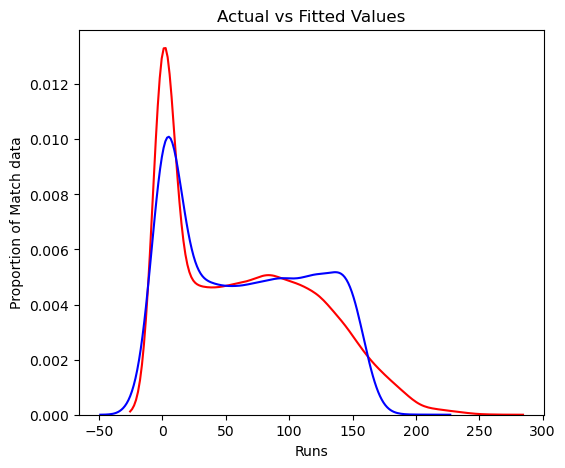

In [43]:
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_lasso, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values')
plt.xlabel('Runs')
plt.ylabel('Proportion of Match data')

plt.show()
plt.close()

In [44]:
#Ridge Regression

In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [46]:
pipe_Ridge = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',GridSearchCV(Ridge(),{'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]},scoring='neg_mean_squared_error',cv=5))
])

In [47]:
#ridge=Ridge()
#parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
#ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
pipe_Ridge.fit(X_train,y_train)

/home/astthecoder/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3',
                 GridSearchCV(cv=5, estimator=Ridge(),
                              param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                    0.01, 1, 5, 10, 20, 30, 35,
                                                    40]},
                              scoring='neg_mean_squared_error'))])

In [48]:
y_pred_ridge = pipe_Ridge.predict(X_test)

print(r2_score(y_test,y_pred_ridge)) 
print(mean_absolute_error(y_test,y_pred_ridge))
print(sqrt(mean_squared_error(y_test,y_pred_ridge)))

0.8840946970241402
13.528754408562836
19.265946162403917


In [49]:
pickle.dump(pipe,open('pipe_update3.pkl','wb'))

/tmp/ipykernel_94253/4252908176.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/tmp/ipykernel_94253/4252908176.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_ridge, hist=False, color="b", label="Fitted 

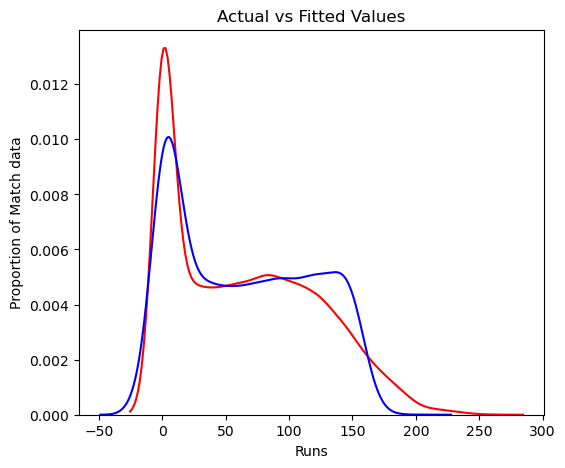

In [50]:
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_ridge, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values')
plt.xlabel('Runs')
plt.ylabel('Proportion of Match data')

plt.show()
plt.close()